<h1><center> MCD - Ciencia de Datos Responsable </center></h1>
<h2><center> Tutorial 1: Introducción COMPAS </center></h2>



In [1]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.api as sm

import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

<h2> COMPAS: Correctional Offender Management Profiling for Alternative Sanctions </h2>

![imagen](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-960*540-00796e.jpg)
<b><h6> Imagen 1 - Machine Bias (ProPublica) </h6></b>

- Algoritmo utilizado en el sistema de justicia criminal de Estados Unidos para predecir la probabilidad o riesgo de reincidencia de un acusado.

- Tiene por objetivo  ayudar a los jueces a tomar decisiones más informadas sobre el riesgo de reincidencia.

Investigación hecha por ProPublica: Existe una clara diferencia en la distribución de los puntajes de riesgo según raza.

<b><h3>Links de interés: </h3></b>

- [Articulo ProPublica : Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

- [Metodología](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm)

- [Códigos originales de ProPublica](https://github.com/propublica/compas-analysis/tree/master)




In [ ]:
compas = pd.read_csv('https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv')
compas.shape

(7214, 53)

In [ ]:
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


## Columnas de interés:

1. `age` - Edad del acusado. Variable numérica.
2. `age_cat` - Categoría de edad. Puede ser < 25, 25-45, >45.
3. `sex` - Sexo del acusado. Puede ser  'Male' o 'Female'.
4. `race` - Raza del acusado. Puede ser 'African-American', 'Caucasian', 'Hispanic', 'Asian', o 'Other'.
5. `c_charge_degree` - Grado del crimen. Es o bien M (Misdemeanor), F (Felony), o O (Ordinary traffic offense).
6. `priors_count` - Número de crimenes anteriores cometidos por el acusado. Variable numérica.
7. `days_b_screening_arrest` - Días entre el arresto y la fecha del cargo por el delito registrado en COMPAS.
8. `decile_score` - Puntaje COMPAS predicho por el sistema. Toma valores entre 0 y 10.
9. `score_text` - Categoria de decile_score. Puede Low (1-4), Medium (5-7), y High (8-10).
10. `is_recid` - Variable que indica si un acusado es reincidente o no. Puede tomar valores 1, 0 o -1.
11. `two_year_recid` - Variable que indica si un acusado tuvo reincidencia dentro de un periodo de dos años.
12. `c_jail_in` - Momento en que el acusado fue ingresado a la carcel.
13. `c_jail_out` - Momento en que el acusado fue liberado de la carcel.

In [ ]:
# Mantenemos las columnas de interés.

columns = ['age', 'c_charge_degree', 'race', 'age_cat',
           'score_text', 'sex', 'priors_count', 'days_b_screening_arrest',
           'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']

compas = compas[columns]


In [ ]:
compas.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
3,23,F,African-American,Less than 25,High,Male,1,NaN,8,0,0,NaN,NaN
4,43,F,Other,25 - 45,Low,Male,2,NaN,1,0,0,NaN,NaN


In [ ]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7214 non-null   int64  
 1   c_charge_degree          7214 non-null   object 
 2   race                     7214 non-null   object 
 3   age_cat                  7214 non-null   object 
 4   score_text               7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   priors_count             7214 non-null   int64  
 7   days_b_screening_arrest  6907 non-null   float64
 8   decile_score             7214 non-null   int64  
 9   is_recid                 7214 non-null   int64  
 10  two_year_recid           7214 non-null   int64  
 11  c_jail_in                6907 non-null   object 
 12  c_jail_out               6907 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 732.8+ KB


En la metodología propuesta por ProPublica (revisar <b>Links de interés</b>) se presentan los siguientes criterios para realizar la limpieza de los datos:

- Si la fecha del cargo por el delito de un acusado evaluado por COMPAS no estaba dentro de los 30 días desde el momento en que la persona fue arrestada, asumimos que, debido a razones de calidad de datos, no tenemos el delito correcto.

- Según se indica en el código publicado por ProPublica, se etiquetó con ```is_recid = -1``` los casos para los cuales no se encontró el caso de COMPAS.

- En una línea similar, se eliminan las infracciones de tráfico comunes (aquellas con un grado de ```c_charge_degree``` <b>'O'</b>), que no resultarían en tiempo de prisión.


In [ ]:
clean_df = compas[((compas['days_b_screening_arrest'] <= 30) &\
                  (compas['days_b_screening_arrest'] >= -30) &\
                  (compas['is_recid'] != -1) &\
                  (compas['c_charge_degree'] != 'O'))]
clean_df.shape

(6172, 13)

In [ ]:
compas.shape

(7214, 13)

In [ ]:
print(f'Se eliminaron {compas.shape[0] - clean_df.shape[0]} regitros.')

Se eliminaron 1042 regitros.


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6172 non-null   int64  
 1   c_charge_degree          6172 non-null   object 
 2   race                     6172 non-null   object 
 3   age_cat                  6172 non-null   object 
 4   score_text               6172 non-null   object 
 5   sex                      6172 non-null   object 
 6   priors_count             6172 non-null   int64  
 7   days_b_screening_arrest  6172 non-null   float64
 8   decile_score             6172 non-null   int64  
 9   is_recid                 6172 non-null   int64  
 10  two_year_recid           6172 non-null   int64  
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 675.1+ KB


In [ ]:
age_count = clean_df['age_cat'].value_counts(normalize=True) * 100
race_count = clean_df['race'].value_counts(normalize=True) * 100
sex_count = clean_df['sex'].value_counts(normalize=True) * 100

## Análisis exploratorio

### Distribución de la edad

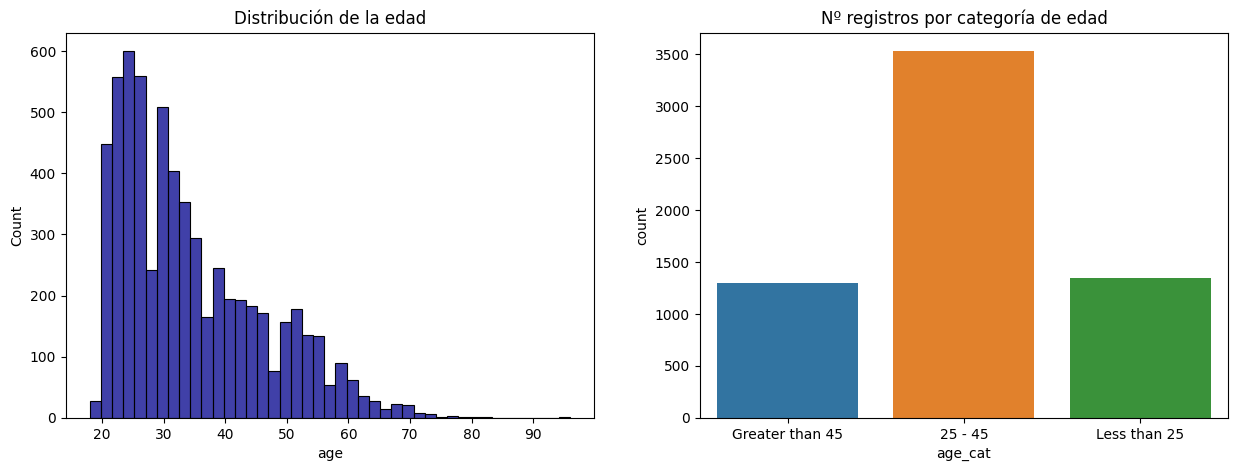

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

sns.histplot(data=clean_df, x='age', color='darkblue', ax=ax[0])
sns.countplot(data=clean_df, x='age_cat', ax=ax[1])

ax[0].set_title('Distribución de la edad')
ax[1].set_title('Nº registros por categoría de edad')
plt.show()


In [ ]:
age_count

25 - 45            57.226183
Less than 25       21.824368
Greater than 45    20.949449
Name: age_cat, dtype: float64

#### Interseccionalidad (edad)

In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['race'], index=clean_df['age_cat'], aggfunc=lambda x: len(x),normalize='all') * 100

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
age_cat,,,,,,
25 - 45,30.751782,0.226831,18.276086,4.714841,0.113415,3.143227
Greater than 45,7.582631,0.178224,10.174984,1.766040,0.032404,1.215165
Less than 25,13.107583,0.097213,5.622165,1.766040,0.032404,1.198963


### Distribución de la raza

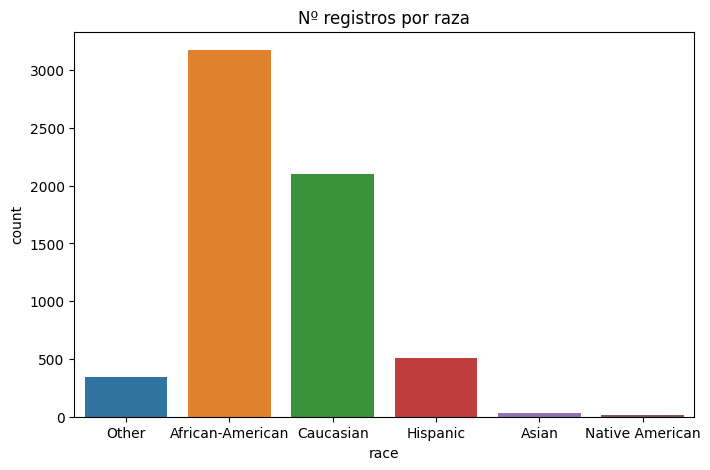

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.countplot(x=clean_df['race'])
plt.title('Nº registros por raza')
plt.show()

In [ ]:
race_count

African-American    51.441996
Caucasian           34.073234
Hispanic             8.246922
Other                5.557356
Asian                0.502268
Native American      0.178224
Name: race, dtype: float64

### Interseccionalidad (raza)


In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['age_cat'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='index') * 100

age_cat,25 - 45,Greater than 45,Less than 25
race,,,
African-American,59.779528,14.740157,25.480315
Asian,45.161290,35.483871,19.354839
Caucasian,53.637660,29.862102,16.500238
Hispanic,57.170923,21.414538,21.414538
Native American,63.636364,18.181818,18.181818
Other,56.559767,21.865889,21.574344


### Distribución del sexo

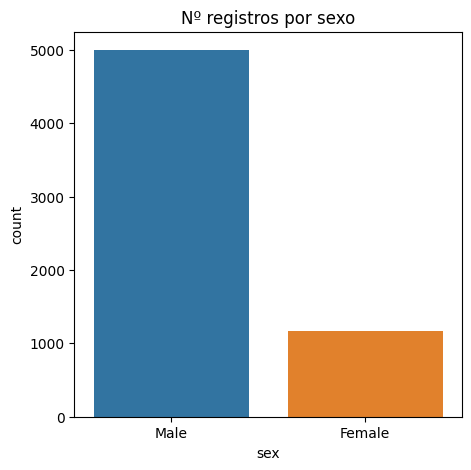

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
sns.countplot(x=clean_df['sex'])
plt.title('Nº registros por sexo')
plt.show()

In [ ]:
sex_count

Male      80.962411
Female    19.037589
Name: sex, dtype: float64

### Interseccionalidad (sexo)

In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['sex'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='all') * 100

sex,Female,Male
race,,
African-American,8.895010,42.546986
Asian,0.032404,0.469864
Caucasian,7.809462,26.263772
Hispanic,1.328581,6.918341
Native American,0.032404,0.145820
Other,0.939728,4.617628


Observemos la reincidencia y distribución de los puntajes de riesgo según raza, sexo y edad.

In [ ]:
# Datos por sexo
male_data = clean_df[clean_df['sex'] == 'Male']
female_data = clean_df[clean_df['sex'] == 'Female']

# Datos por raza
am_data = clean_df[clean_df['race'] == 'African-American']
cau_data = clean_df[clean_df['race'] == 'Caucasian']

# Datos por categoria de edad
less25_data = clean_df[clean_df['age_cat'] == 'Less than 25']
greater45_data = clean_df[clean_df['age_cat'] == 'Greater than 45']
from25to45_data = clean_df[clean_df['age_cat'] == '25 - 45']



¿Existen diferencias en la reincidencia registrada por sexo?

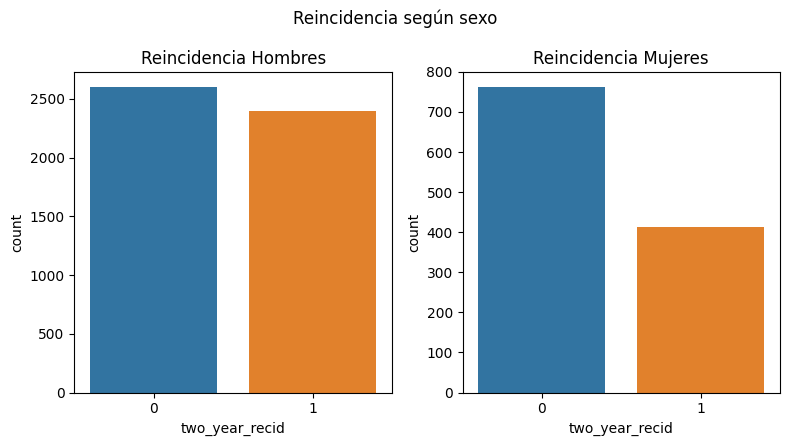

In [ ]:
#@title Reincidencia según sexo.
fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(data=male_data, x='two_year_recid', ax=ax[0])
sns.countplot(data=female_data, x='two_year_recid', ax=ax[1])


ax[0].set_title('Reincidencia Hombres')
ax[1].set_title('Reincidencia Mujeres')


plt.suptitle('Reincidencia según sexo')

fig.tight_layout()


plt.show()


In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['two_year_recid'], index=clean_df['sex'], aggfunc=lambda x: len(x), normalize='index') * 100

two_year_recid,0,1
sex,,
Female,64.851064,35.148936
Male,52.051231,47.948769


¿Existen diferencias en la reincidencia registrada por raza?

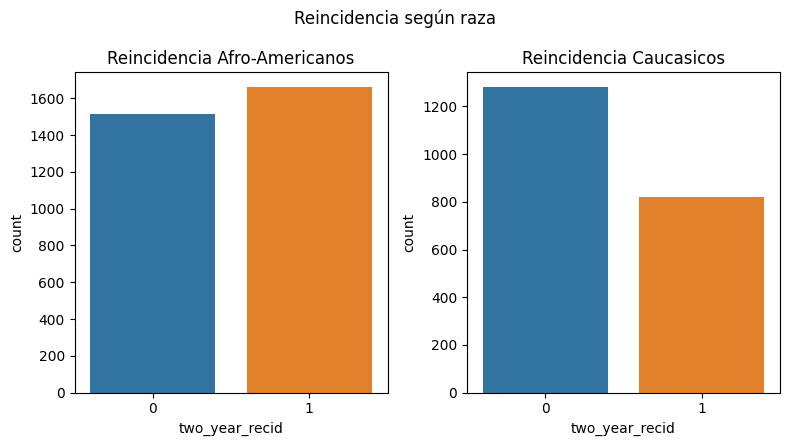

In [ ]:
#@title Reincidencia según raza.

fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(x=am_data['two_year_recid'], ax=ax[0])
sns.countplot(x=cau_data['two_year_recid'], ax=ax[1])


ax[0].set_title('Reincidencia Afro-Americanos')
ax[1].set_title('Reincidencia Caucasicos')


plt.suptitle('Reincidencia según raza')

fig.tight_layout()


plt.show()

In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['two_year_recid'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='index') * 100

two_year_recid,0,1
race,,
African-American,47.685039,52.314961
Asian,74.193548,25.806452
Caucasian,60.912981,39.087019
Hispanic,62.868369,37.131631
Native American,54.545455,45.454545
Other,63.848397,36.151603


¿Existen diferencias en la reincidencia registrada por categoría de edad?

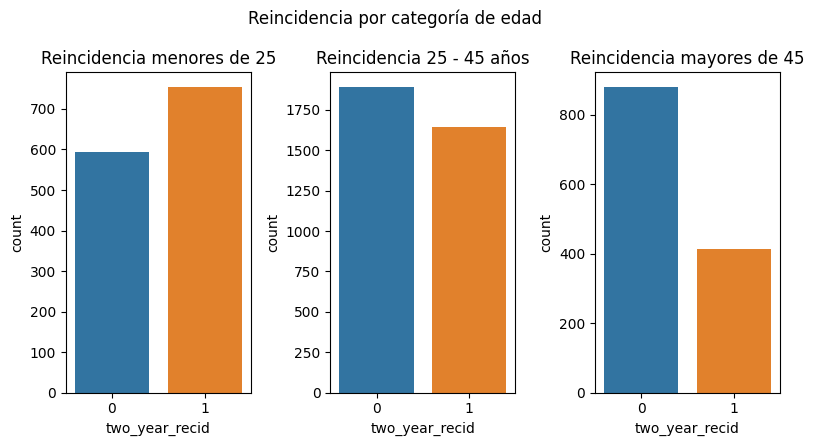

In [ ]:
#@title Reincidencia según categoría de edad

fig, ax = plt.subplots(1, 3, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(x=less25_data['two_year_recid'], ax=ax[0])
sns.countplot(x=from25to45_data['two_year_recid'], ax=ax[1])
sns.countplot(x=greater45_data['two_year_recid'], ax=ax[2])



ax[0].set_title('Reincidencia menores de 25')
ax[1].set_title('Reincidencia 25 - 45 años')
ax[2].set_title('Reincidencia mayores de 45')


plt.suptitle('Reincidencia por categoría de edad')

fig.tight_layout()


plt.show()

In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['two_year_recid'], index=clean_df['age_cat'], aggfunc=lambda x: len(x), normalize='index') * 100

two_year_recid,0,1
age_cat,,
25 - 45,53.539071,46.460929
Greater than 45,67.981439,32.018561
Less than 25,44.023756,55.976244


¿Existen diferencias en la distribución de los puntajes de riesgo por sexo?

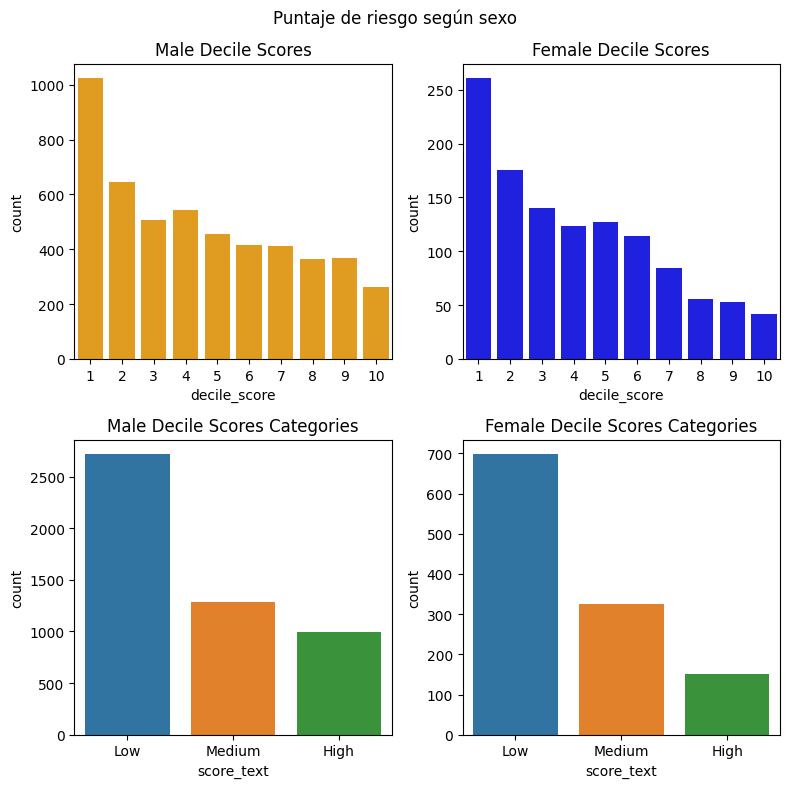

In [ ]:
#@title Riesgo según sexo.
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.flatten()

sns.countplot(x=male_data['decile_score'], ax=ax[0], color='orange')
sns.countplot(x=female_data['decile_score'], ax=ax[1], color='blue')
sns.countplot(x=male_data['score_text'], ax=ax[2])
sns.countplot(x=female_data['score_text'], ax=ax[3])

ax[0].set_title('Male Decile Scores')
ax[1].set_title('Female Decile Scores')
ax[2].set_title('Male Decile Scores Categories')
ax[3].set_title('Female Decile Scores Categories')

plt.suptitle('Puntaje de riesgo según sexo')

fig.tight_layout()


plt.show()


¿Existen diferencias en la distribución de los puntajes de riesgo por raza?

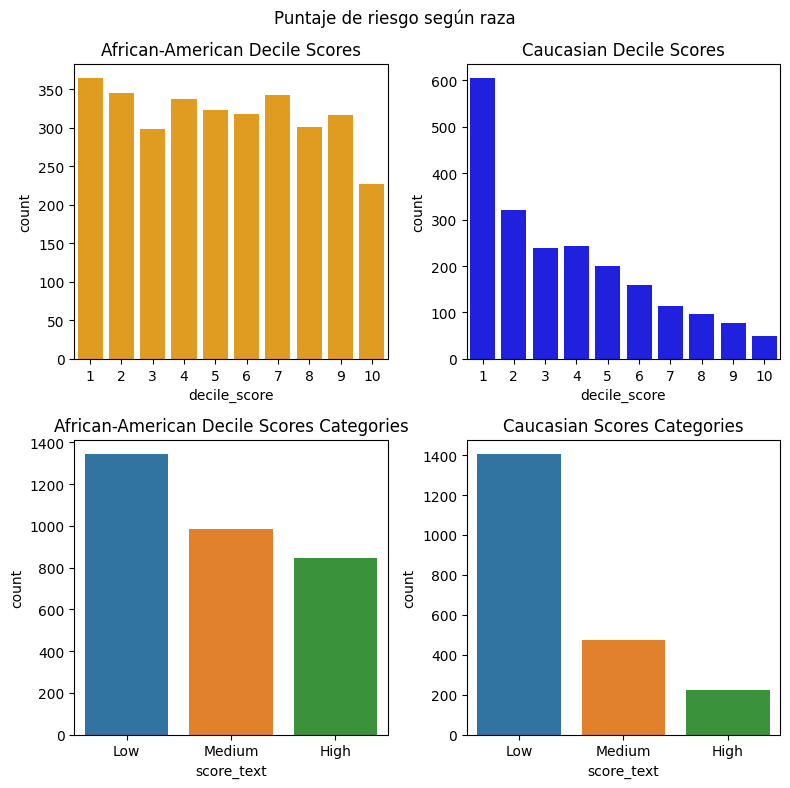

In [ ]:
#@title Riesgo según raza.
fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

sns.countplot(x=am_data['decile_score'], ax=ax[0], color='orange')
sns.countplot(x=cau_data['decile_score'], ax=ax[1], color='blue')
sns.countplot(x=am_data['score_text'], ax=ax[2], order=['Low', 'Medium', 'High'])
sns.countplot(x=cau_data['score_text'], ax=ax[3], order=['Low', 'Medium', 'High'])

ax[0].set_title('African-American Decile Scores')
ax[1].set_title('Caucasian Decile Scores')
ax[2].set_title('African-American Decile Scores Categories')
ax[3].set_title('Caucasian Scores Categories')

plt.suptitle('Puntaje de riesgo según raza')

fig.tight_layout()


plt.show()

In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['score_text'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='index') * 100

score_text,High,Low,Medium
race,,,
African-American,26.614173,42.393701,30.992126
Asian,9.677419,77.419355,12.903226
Caucasian,10.603899,66.904422,22.491679
Hispanic,9.233792,72.298625,18.467583
Native American,36.363636,27.272727,36.363636
Other,6.413994,79.591837,13.994169


¿Existen diferencias en la distribución de los puntajes de riesgo por categoría de edad?

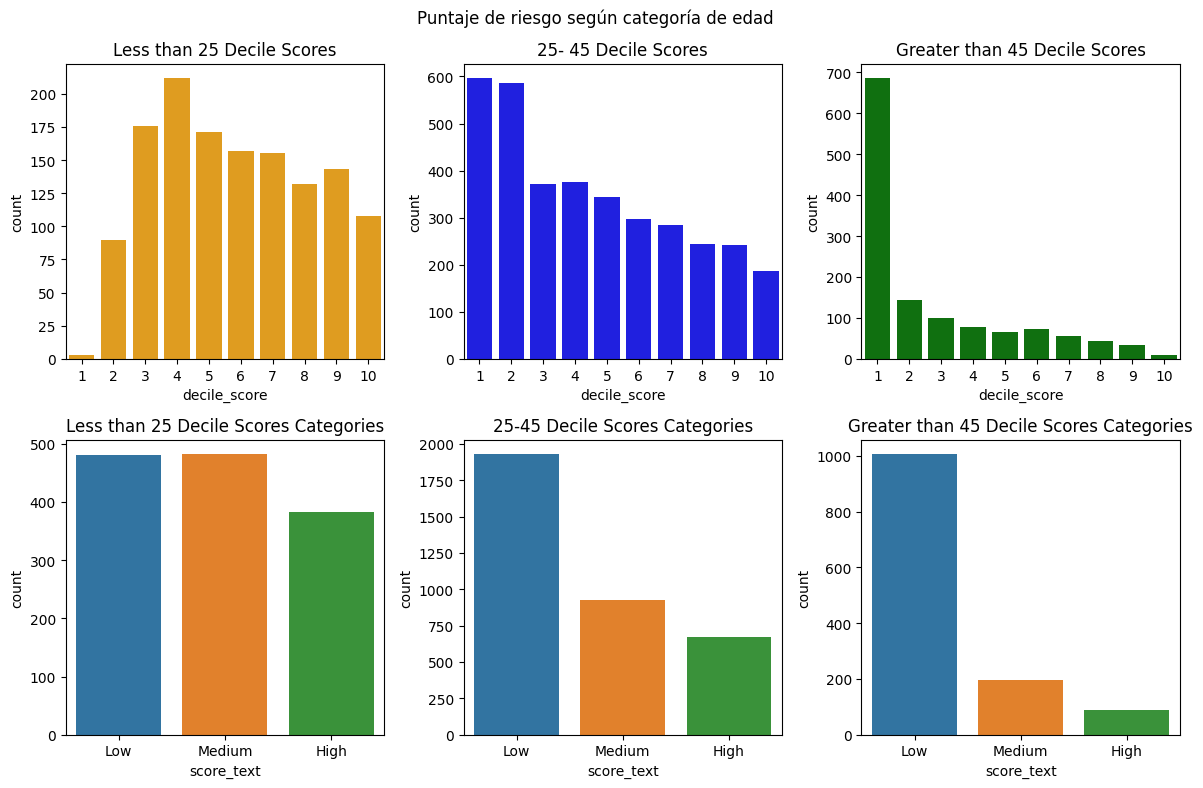

In [ ]:
#@title Riesgo según categoría de edad.

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()

sns.countplot(x=less25_data['decile_score'], ax=ax[0], color='orange')
sns.countplot(x=from25to45_data['decile_score'], ax=ax[1], color='blue')
sns.countplot(x=greater45_data['decile_score'], ax=ax[2], color='green')

sns.countplot(x=less25_data['score_text'], ax=ax[3], order=['Low', 'Medium', 'High'])
sns.countplot(x=from25to45_data['score_text'], ax=ax[4], order=['Low', 'Medium', 'High'])
sns.countplot(x=greater45_data['score_text'], ax=ax[5], order=['Low', 'Medium', 'High'])

ax[0].set_title('Less than 25 Decile Scores')
ax[1].set_title('25- 45 Decile Scores')
ax[2].set_title('Greater than 45 Decile Scores')
ax[3].set_title('Less than 25 Decile Scores Categories')
ax[4].set_title('25-45 Decile Scores Categories')
ax[5].set_title('Greater than 45 Decile Scores Categories')


plt.suptitle('Puntaje de riesgo según categoría de edad')

fig.tight_layout()


plt.show()

In [ ]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['score_text'], index=clean_df['age_cat'], aggfunc=lambda x: len(x), normalize='index') * 100

score_text,High,Low,Medium
age_cat,,,
25 - 45,19.054360,54.699887,26.245753
Greater than 45,6.805878,77.958237,15.235886
Less than 25,28.433556,35.708983,35.857461


## Pre - procesamiento


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6172 non-null   int64  
 1   c_charge_degree          6172 non-null   object 
 2   race                     6172 non-null   object 
 3   age_cat                  6172 non-null   object 
 4   score_text               6172 non-null   object 
 5   sex                      6172 non-null   object 
 6   priors_count             6172 non-null   int64  
 7   days_b_screening_arrest  6172 non-null   float64
 8   decile_score             6172 non-null   int64  
 9   is_recid                 6172 non-null   int64  
 10  two_year_recid           6172 non-null   int64  
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 675.1+ KB


In [ ]:
object_columns = clean_df.select_dtypes(include='object').columns
for objcol in object_columns:
  print(f'Columna {objcol}: {clean_df[objcol].unique()}')

Columna c_charge_degree: ['F' 'M']
Columna race: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']
Columna age_cat: ['Greater than 45' '25 - 45' 'Less than 25']
Columna score_text: ['Low' 'Medium' 'High']
Columna sex: ['Male' 'Female']
Columna c_jail_in: ['2013-08-13 06:03:42' '2013-01-26 03:45:27' '2013-04-13 04:58:34' ...
 '2014-01-13 05:48:01' '2014-03-08 08:06:02' '2014-06-28 12:16:41']
Columna c_jail_out: ['2013-08-14 05:41:20' '2013-02-05 05:36:53' '2013-04-14 07:02:04' ...
 '2014-01-14 07:49:46' '2014-03-09 12:18:04' '2014-06-30 11:19:23']


In [ ]:
object_columns = [x for x in clean_df.select_dtypes(include='object').columns if x != 'c_jail_in' and x!= 'c_jail_out']
for objcol in object_columns:
  clean_df[objcol] = clean_df[objcol].astype('category')

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      6172 non-null   int64   
 1   c_charge_degree          6172 non-null   category
 2   race                     6172 non-null   category
 3   age_cat                  6172 non-null   category
 4   score_text               6172 non-null   category
 5   sex                      6172 non-null   category
 6   priors_count             6172 non-null   int64   
 7   days_b_screening_arrest  6172 non-null   float64 
 8   decile_score             6172 non-null   int64   
 9   is_recid                 6172 non-null   int64   
 10  two_year_recid           6172 non-null   int64   
 11  c_jail_in                6172 non-null   object  
 12  c_jail_out               6172 non-null   object  
dtypes: category(5), float64(1), int64(5), object(2)
memory usage: 4

In [ ]:
clean_df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


In [ ]:
pd.get_dummies(clean_df['race']).head()

,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,1,0,0,0,0,0
5,0,0,0,0,0,1
6,0,0,1,0,0,0


In [ ]:
post_df = clean_df.copy()

In [ ]:
#@title Dummies race

dummies = pd.get_dummies(post_df['race'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['race', 'Caucasian'], inplace=True)

In [ ]:
clean_df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


In [ ]:
#@title Dummies age_cat

dummies = pd.get_dummies(post_df['age_cat'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['age_cat', '25 - 45'], inplace=True)

In [ ]:
#@title Dummies sex

dummies = pd.get_dummies(post_df['sex'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['sex', 'Male'], inplace=True)

In [ ]:
#@title Dummies Charge Degree

dummies = pd.get_dummies(post_df['c_charge_degree'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['c_charge_degree', 'F'], inplace=True)

In [ ]:
post_df.head()

,age,score_text,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other,Greater than 45,Less than 25,Female,M
0,69,Low,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,0,0,1,1,0,0,0
1,34,Low,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,0,0,0,0,0,0,0,0
2,24,Low,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,0,0,0,0,1,0,0
5,44,Low,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,0,0,0,0,1,0,0,0,1
6,41,Medium,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,0,0,0,0,0,0,0,0,0


<h1><center> MCD - Ciencia de Datos Responsable </center></h1>
<h2><center> Tutorial 3: Regresión Logística COMPAS </center></h2>

En el presente tutorial continuaremos con el análisis de los datos de ProPublica respecto del algoritmo COMPAS, que estuvimos viendo durante los tutoriales anteriores. En particular, el objetivo de este tutorial es evaluar y cuantificar los efectos de la raza y edad sobre las predicciones de este algoritmo.

Para iniciar, haremos algunas modificaciones pendientes a los datos que teniamos en el tutorial anterior. Recordemos como se veían estos datos:

In [ ]:
# Datos tutorial anterior.
post_df.head()

,age,score_text,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other,Greater than 45,Less than 25,Female,M
0,69,Low,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,0,0,1,1,0,0,0
1,34,Low,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,0,0,0,0,0,0,0,0
2,24,Low,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,0,0,0,0,1,0,0
5,44,Low,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,0,0,0,0,1,0,0,0,1
6,41,Medium,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,0,0,0,0,0,0,0,0,0


Lo primero será convertir la variable `score_text` a binario. Para ello, mapearemos `Low` $\to$ 0, `Medium` $\to$ 1, `High` $\to$ 1.

In [ ]:
post_df['score_text'] = post_df['score_text'].map({'Low': 0, 'Medium': 1, 'High': 1})
post_df.head()

,age,score_text,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other,Greater than 45,Less than 25,Female,M
0,69,0,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,0,0,1,1,0,0,0
1,34,0,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,0,0,0,0,0,0,0,0
2,24,0,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,0,0,0,0,1,0,0
5,44,0,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,0,0,0,0,1,0,0,0,1
6,41,1,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,0,0,0,0,0,0,0,0,0


Renombraremos algunas columnas para evitar problemas al utilizar `statsmodels` para ajustar la regresión logística.

In [ ]:
post_df.rename(columns={'Native American': 'Native_American', 'Greater than 45': 'Greater_than_45',
                        'Less than 25': 'Less_than_25', 'African-American': 'African_American'}, inplace=True)

post_df.head()

,age,score_text,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African_American,Asian,Hispanic,Native_American,Other,Greater_than_45,Less_than_25,Female,M
0,69,0,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,0,0,1,1,0,0,0
1,34,0,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,0,0,0,0,0,0,0,0
2,24,0,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,0,0,0,0,1,0,0
5,44,0,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,0,0,0,0,1,0,0,0,1
6,41,1,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,0,0,0,0,0,0,0,0,0


## Regresión Logística

La idea de ajustar una regresión logística entre las predicciones del modelo COMPAS (variable dependiente) y los factores (variables independientes) que consideraremos (delitos anteriores (`priors_count`), comportamiento criminal futuro (`two_year_recid`), raza y grupo etáreo) es justamente poder cuantificar la asociación o efecto de la pertenencia a cierto grupo racial o etáreo sobre la variable dependiente (predicción del modelo COMPAS).

Esto podemos hacerlo mediante el cálculo del **riesgo relativo**. Para esto necesitaremos los coeficientes de la regresión logística.

Partamos definando la fórmula a utilizar en el ajuste para luego ajustar el modelo.



In [ ]:
# Definimos la formula

formula = 'score_text ~ priors_count + two_year_recid + African_American + Asian + Hispanic + Native_American + Other + Greater_than_45 + Less_than_25 + Female + M'

In [ ]:
# Instanciamos y ajustamos el modelo

model = sm.formula.glm(formula=formula, family=sm.families.Binomial(), data = post_df).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             score_text   No. Observations:                 6172
Model:                            GLM   Df Residuals:                     6160
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3084.2
Date:                Mon, 21 Aug 2023   Deviance:                       6168.4
Time:                        00:41:39   Pearson chi2:                 6.07e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3128
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5255      0.079  

### Relative Risk

Recordemos que la regresión logística ajusta una función de la forma:

$
y = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p)}}
$

que es equivalente a:

$
y = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p}}
$

donde en nuestro caso $y$ representa la probabilidad de ser clasificado como alto riesgo de reincidencia.

El riesgo relativo para una variable $X_i$ será:

$RR = \frac{\frac{e^{\beta_0 + \beta_iX_i }}{1 + e^{\beta_0 + \beta_iX_i}}}{\frac{e^{\beta_0}}{1 + e^{\beta_0}}}$


In [ ]:
def relative_risk(coef_0, coef_i):
  control = np.exp(coef_0) / (1 + np.exp(coef_0))
  group_prob = np.exp(coef_0 + coef_i) / (1 + np.exp(coef_0 + coef_i))
  relative_risk = group_prob / control
  return relative_risk

In [ ]:
# Riesgo relativo para acusados afro-americanos.
am_rr = relative_risk(-1.5255, 0.4772)
am_rr

1.4528254070016209

Los acusados afroamericanos tienen un 45 % más de probabilidades que los acusados blancos de recibir una puntuación alta si se mantienen controladas la gravedad de su delito, los arrestos anteriores y el comportamiento delictivo futuro.

In [ ]:
# Riesgo relativo para menores de 25 años.

young_rr = relative_risk(-1.5255, 1.3084)
young_rr

2.496107351371129

Los acusados jovenes tienen cerca de 2.5 veces la probabilidad que los acusados de mayor edad de recibir una puntuación alta si se mantienen controladas la gravedad de su delito, los arrestos anteriores y el comportamiento delictivo futuro.

In [ ]:
# Riesgo relativo para las mujeres

female_rr = relative_risk(-1.5255, 0.2213)
female_rr

1.194824380776999

Las acusadas mujeres tienen un 20% más de probabilidades que los acusados hombres de recibir una puntuación alta si se mantienen controladas la gravedad de su delito, los arrestos anteriores y el comportamiento delictivo futuro.

<h1><center> MCD - Ciencia de Datos Responsable </center></h1>
<h2><center> Tutorial 4: Aequitas </center></h2>

El objetivo de este tutorial es introducir el toolkit `Aequitas`. En particular, veremos como obtener algunas métricas grupales que nos sirven para evaluar el comportamiento del algoritmo en los distintos grupos, primero mediante matrices de confusión (sklearn) y luego mediante `Aequitas`.

**Recomendación**: Leer el paper de Aequitas (presente en la bibliografía de esta semana) antes de ver este tutorial.

## Conceptos preliminares y métricas (extraídas del paper de Aequitas)

![Conceptos Preliminares](https://github.com/dssg/aequitas/blob/master/docs/_images/preliminary_concepts.jpg?raw=true)

![Métricas](https://github.com/dssg/aequitas/blob/master/docs/_images/metrics.jpg?raw=true)

## Obteniendo las métricas a través de matrices de confusión

In [ ]:
# Datos por sexo
male_data = post_df[post_df['Female'] == 0]
female_data = post_df[post_df['Female'] == 1]

# Datos por raza
am_data = post_df[post_df['African_American'] == 1]

cau_data = post_df[((post_df['African_American'] == 0) &\
                    (post_df['Asian'] == 0) &\
                    (post_df['Native_American'] == 0) &\
                    (post_df['Hispanic'] == 0))]

# Datos por categoria de edad
less25_data = post_df[post_df['Less_than_25'] == 1]
greater45_data = post_df[post_df['Greater_than_45'] == 1]

from25to45_data = post_df[((post_df['Less_than_25'] == 0) &\
                          (post_df['Greater_than_45'] == 0))]


labels=['No Reincide', 'Reincide']

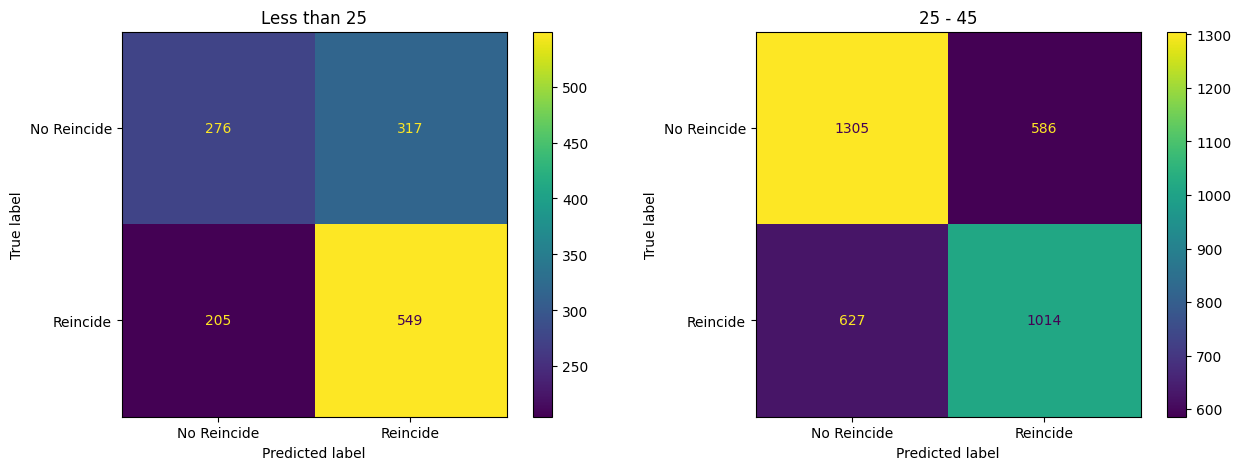

In [ ]:
#@title Comparando matrices de confusión por grupo etáreo (absoluta).

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()
cm1 = ConfusionMatrixDisplay(confusion_matrix(less25_data['two_year_recid'], less25_data['score_text']), display_labels=labels)
cm2 = ConfusionMatrixDisplay(confusion_matrix(from25to45_data['two_year_recid'], from25to45_data['score_text']), display_labels=labels)

cm1.plot(ax=ax[0])
cm2.plot(ax=ax[1])

ax[0].set_title('Less than 25')
ax[1].set_title('25 - 45')
plt.show()

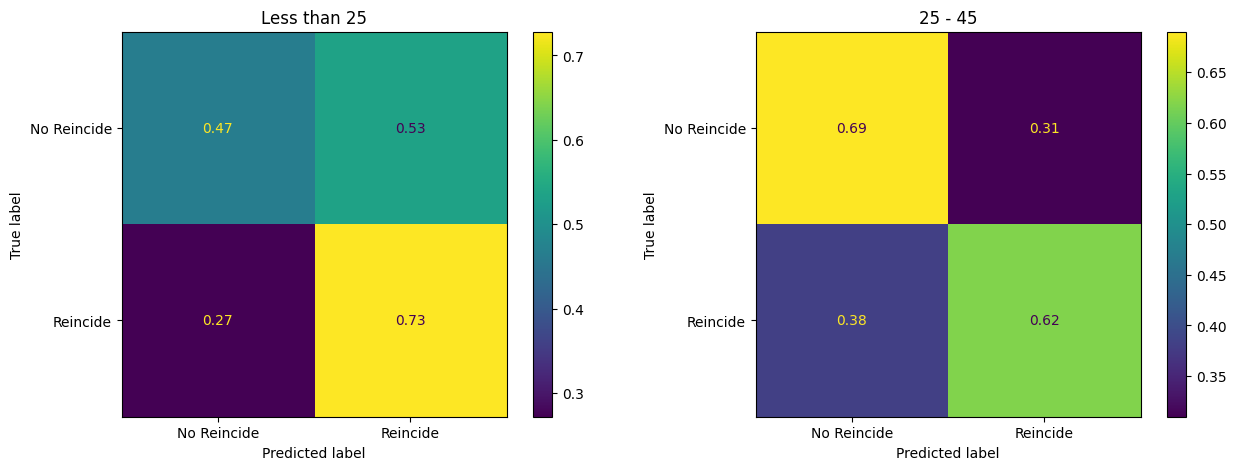

In [ ]:
#@title Comparando matrices de confusión por grupo etáreo (relativa a las etiquetas: FPR, FNR).

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()
cm1 = ConfusionMatrixDisplay(confusion_matrix(less25_data['two_year_recid'], less25_data['score_text'], normalize='true'), display_labels=labels)
cm2 = ConfusionMatrixDisplay(confusion_matrix(from25to45_data['two_year_recid'], from25to45_data['score_text'], normalize='true'), display_labels=labels)

cm1.plot(ax=ax[0])
cm2.plot(ax=ax[1])

ax[0].set_title('Less than 25')
ax[1].set_title('25 - 45')
plt.show()

Vemos que el FPR para el grupo de menores de 25 años es de 0.53 mientras que el FPR para el grupo de entre 25 y 45 años es de 0.31 $\to$ Las predicciones del algoritmo tienden a equivocarse más etiquetando como reincidente a aquellos que no reindiden en el grupo de menores de 25 años respecto del grupo de entre 25 y 45 años.

Por otro lado, el FNR para el grupo de menores de 25 años es de 0.27 mientras que el FPR para el grupo de entre 25 y 45 años es de 0.38 $\to$ Las predicciones del algoritmo tienden a equivocarse más etiquetando como no reincidente a aquellos que sí reinciden en el grupo de entre 25 y 45 años respecto del grupo de menores de 25 años.

In [ ]:
conf = confusion_matrix(less25_data['two_year_recid'], less25_data['score_text'], normalize='true').flatten()
conf

array([0.46543002, 0.53456998, 0.27188329, 0.72811671])

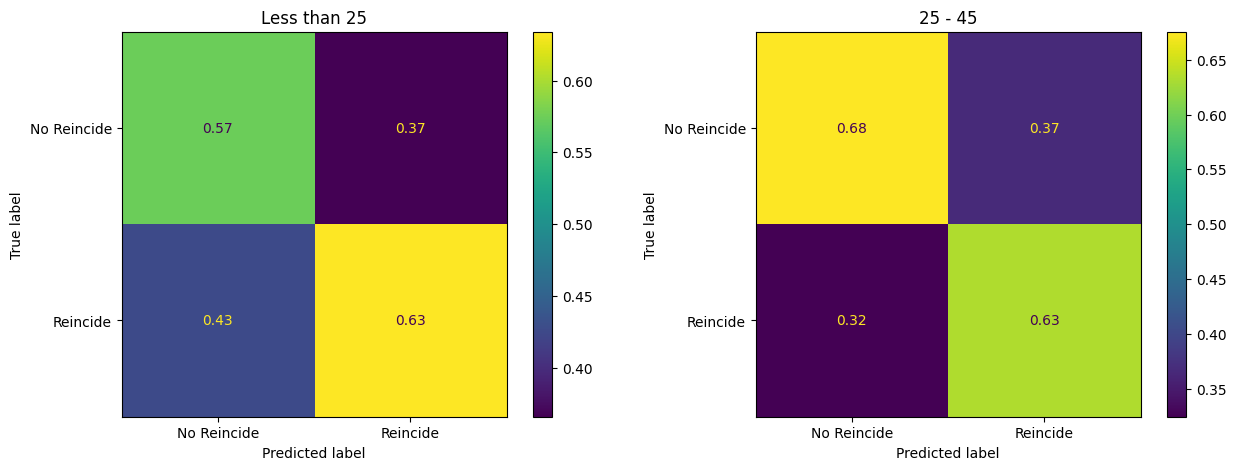

In [ ]:
#@title Comparando matrices de confusión por grupo etáreo (relativa a las predicciones: FDR, FOR).

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()
cm1 = ConfusionMatrixDisplay(confusion_matrix(less25_data['two_year_recid'], less25_data['score_text'], normalize='pred'), display_labels=labels)
cm2 = ConfusionMatrixDisplay(confusion_matrix(from25to45_data['two_year_recid'], from25to45_data['score_text'], normalize='pred'), display_labels=labels)

cm1.plot(ax=ax[0])
cm2.plot(ax=ax[1])

ax[0].set_title('Less than 25')
ax[1].set_title('25 - 45')
plt.show()

El FOR (False Omission Rate) es mayor en el grupo de menores de 25 años que en el grupo de 25 a 45 años $\to$ El algoritmo "deja pasar" más casos positivos (se le escapan) en el grupo de menores de 25 años que en el grupo de 25 a 45 años.

In [ ]:
%%capture
!pip install aequitas

In [ ]:
from aequitas.group import Group

In [ ]:
# Teníamos los datos de esta forma.

clean_df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


Para utilizar Aequitas con nuestros datos, estos deben tener una estructura en específico. Los detalles se encuentran en la [Documentación de Aequitas](https://dssg.github.io/aequitas/input_data.html#Input-data-for-Python-package).

In [ ]:
# Seleccionamos las columnas necesarias.

df = clean_df[['score_text', 'two_year_recid', 'race', 'age_cat', 'sex']]
df.head()

,score_text,two_year_recid,race,age_cat,sex
0,Low,0,Other,Greater than 45,Male
1,Low,1,African-American,25 - 45,Male
2,Low,1,African-American,Less than 25,Male
5,Low,0,Other,25 - 45,Male
6,Medium,1,Caucasian,25 - 45,Male


In [ ]:
# score_text a variable binaria.

df['score_text'] = df['score_text'].map({'Low': 0, 'Medium': 1, 'High': 1})
df.head()

,score_text,two_year_recid,race,age_cat,sex
0,0,0,Other,Greater than 45,Male
1,0,1,African-American,25 - 45,Male
2,0,1,African-American,Less than 25,Male
5,0,0,Other,25 - 45,Male
6,1,1,Caucasian,25 - 45,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   score_text      6172 non-null   int64   
 1   two_year_recid  6172 non-null   int64   
 2   race            6172 non-null   category
 3   age_cat         6172 non-null   category
 4   sex             6172 non-null   category
dtypes: category(3), int64(2)
memory usage: 163.2 KB


In [ ]:
cat_cols = df.select_dtypes(include='category').columns
for col in cat_cols:
  df[col] = df[col].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   score_text      6172 non-null   int64 
 1   two_year_recid  6172 non-null   int64 
 2   race            6172 non-null   object
 3   age_cat         6172 non-null   object
 4   sex             6172 non-null   object
dtypes: int64(2), object(3)
memory usage: 289.3+ KB


In [ ]:
# Renombrar las columnas

df.rename(columns={'score_text': 'score', 'two_year_recid': 'label_value'}, inplace=True)

In [ ]:
df.head()

,score,label_value,race,age_cat,sex
0,0,0,Other,Greater than 45,Male
1,0,1,African-American,25 - 45,Male
2,0,1,African-American,Less than 25,Male
5,0,0,Other,25 - 45,Male
6,1,1,Caucasian,25 - 45,Male


In [ ]:
group = Group()
xtab, _ = group.get_crosstabs(df)

In [ ]:
xtab.head()

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,2751,race,African-American,0.715232,0.576618,0.351412,0.350465,0.423382,...,0.576063,641,473,873,1188,1661,1514,3175,6172,0.523150
1,0,binary 0/1,2751,race,Asian,0.625000,0.913043,0.125000,0.285714,0.086957,...,0.225806,2,3,21,5,8,23,31,6172,0.258065
2,0,binary 0/1,2751,race,Caucasian,0.503650,0.779859,0.289979,0.405172,0.220141,...,0.330956,282,408,999,414,822,1281,2103,6172,0.390870
3,0,binary 0/1,2751,race,Hispanic,0.417989,0.806250,0.298913,0.439716,0.193750,...,0.277014,62,110,258,79,189,320,509,6172,0.371316
4,0,binary 0/1,2751,race,Native American,1.000000,0.500000,0.000000,0.375000,0.500000,...,0.727273,3,0,3,5,5,6,11,6172,0.454545


In [ ]:
xtab.columns

Index(['model_id', 'score_threshold', 'k', 'attribute_name', 'attribute_value',
       'tpr', 'tnr', 'for', 'fdr', 'fpr', 'fnr', 'npv', 'precision', 'pp',
       'pn', 'ppr', 'pprev', 'fp', 'fn', 'tn', 'tp', 'group_label_pos',
       'group_label_neg', 'group_size', 'total_entities', 'prev'],
      dtype='object')

#### Group Counts Calculated:

| Count Type | Column Name |
| --- | --- |
| False Positive Count | 'fp' |
| False Negative Count | 'fn' |
| True Negative Count | 'tn' |
| True Positive Count | 'tp' |
| Predicted Positive Count | 'pp' |
| Predicted Negative Count | 'pn' |
| Count of Negative Labels in Group | 'group_label_neg' |
| Count of Positive Labels in Group | 'group_label_pos' |
| Group Size | 'group_size'|
| Total Entities | 'total_entities' |

#### Absolute Metrics Calculated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate | 'tpr' |
| True Negative Rate | 'tnr' |
| False Omission Rate | 'for' |
| False Discovery Rate | 'fdr' |
| False Positive Rate | 'fpr' |
| False Negative Rate | 'fnr' |
| Negative Predictive Value | 'npv' |
| Precision | 'precision' |
| Predicted Positive Ratio$_k$ | 'ppr' |
| Predicted Positive Ratio$_g$ | 'pprev' |
| Group Prevalence | 'prev' |


In [ ]:
absolute_metrics = group.list_absolute_metrics(xtab)
absolute_metrics

['tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'ppr',
 'pprev',
 'prev']

In [ ]:
absolute_xtab = xtab[['attribute_name', 'attribute_value'] + absolute_metrics]
absolute_xtab

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.715232,0.576618,0.351412,0.350465,0.423382,0.284768,0.648588,0.649535,0.664849,0.576063,0.523150
1,race,Asian,0.625000,0.913043,0.125000,0.285714,0.086957,0.375000,0.875000,0.714286,0.002545,0.225806,0.258065
2,race,Caucasian,0.503650,0.779859,0.289979,0.405172,0.220141,0.496350,0.710021,0.594828,0.252999,0.330956,0.390870
3,race,Hispanic,0.417989,0.806250,0.298913,0.439716,0.193750,0.582011,0.701087,0.560284,0.051254,0.277014,0.371316
4,race,Native American,1.000000,0.500000,0.000000,0.375000,0.500000,0.000000,1.000000,0.625000,0.002908,0.727273,0.454545
5,race,Other,0.338710,0.872146,0.300366,0.400000,0.127854,0.661290,0.699634,0.600000,0.025445,0.204082,0.361516
6,age_cat,25 - 45,0.617916,0.690111,0.324534,0.366250,0.309889,0.382084,0.675466,0.633750,0.581607,0.453001,0.464609
7,age_cat,Greater than 45,0.410628,0.869170,0.242063,0.403509,0.130830,0.589372,0.757937,0.596491,0.103599,0.220418,0.320186
8,age_cat,Less than 25,0.728117,0.465430,0.426195,0.366051,0.534570,0.271883,0.573805,0.633949,0.314795,0.642910,0.559762
9,sex,Female,0.595642,0.698163,0.238913,0.483193,0.301837,0.404358,0.761087,0.516807,0.173028,0.405106,0.351489


<h1><center> MCD - Ciencia de Datos Responsable </center></h1>
<h2><center> Tutorial 5: Aequitas Bias & Fairness </center></h2>

El objetivo de este tutorial es continuar con la presentación de la librería `Aequitas`. Se introducirán medidas derivadas de las métricas grupales presentadas en el tutorial anterior que nos permiten cuantificar el sesgo presente en los puntajes predichos por COMPAS, como también medir si las predicciones se ajustan a lo que establezcamos como justo. También se presentan las herramientas gráficas que provee esta librería para la visualización de los resultados.

In [ ]:
from aequitas.plotting import Plot # Group - matplotlib

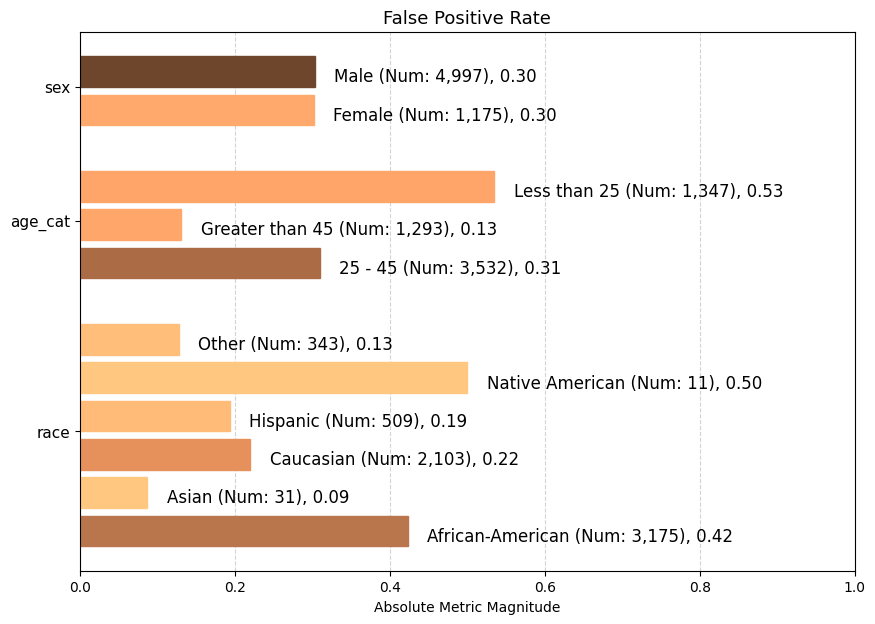

In [ ]:
#@title Plot: False Positive Rate

fig, ax = plt.subplots(1, figsize=(10, 7))
aqp = Plot()
aqp.plot_group_metric(xtab, 'fpr', ax=ax)
ax.set_title('False Positive Rate', fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
plt.show()

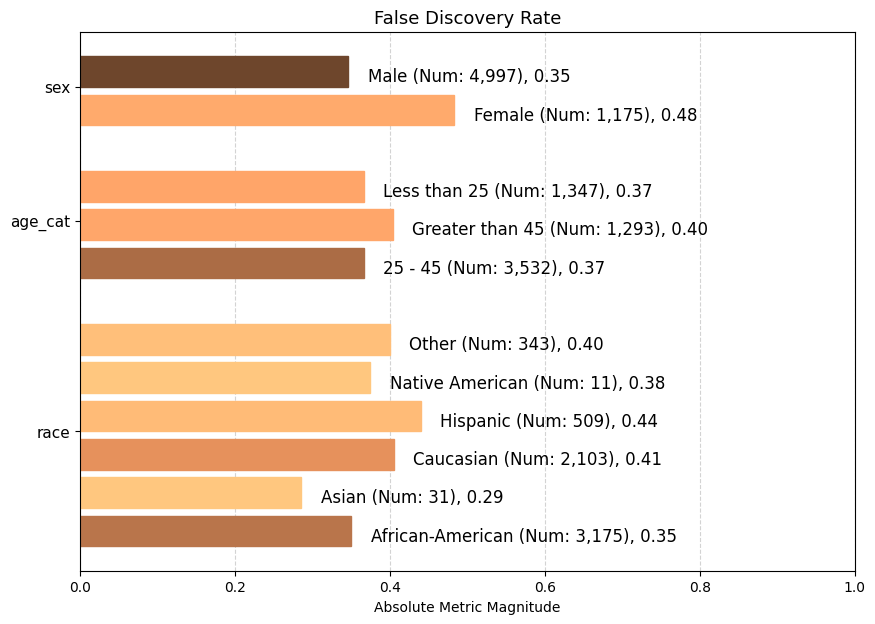

In [ ]:
#@title Plot: False Discovery Rate

fig, ax = plt.subplots(1, figsize=(10, 7))
aqp = Plot()
aqp.plot_group_metric(xtab, 'fdr', ax=ax)
ax.set_title('False Discovery Rate', fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
plt.show()

## ¿Qué niveles de disparidad existen entre los grupos de población?

Podemos obtener la disparidad respecto de grupos pre-definidos (get_disparity_predefined_groups()), respecto del grupo más representado (get_disparity_major_group()) y respecto de aquel que tiene el menor valor de métrica (get_disparity_min_metric()). Por ejemplo:

$$Disparity_{FNR} =  \frac{FNR_{black}}{FNR_{white}}$$

#### Disparities Calculated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate Disparity | 'tpr_disprity' |
| True Negative Rate | 'tnr_disparity' |
| False Omission Rate | 'for_disparity' |
| False Discovery Rate | 'fdr_disparity' |
| False Positive Rate | 'fpr_disparity' |
| False NegativeRate | 'fnr_disparity' |
| Negative Predictive Value | 'npv_disparity' |
| Precision Disparity | 'precision_disparity' |
| Predicted Positive Ratio$_k$ Disparity | 'ppr_disparity' |
| Predicted Positive Ratio$_g$ Disparity | 'pprev_disparity' |


Se agregan columnas para cada disparidad al crosstab.

In [ ]:
from aequitas.bias import Bias

In [ ]:
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, original_df=df,
                                        ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'},
                                        check_significance=True)

get_disparity_predefined_group()


In [ ]:
bdf.head()

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,2751,race,African-American,0.715232,0.576618,0.351412,0.350465,0.423382,...,False,False,False,True,True,False,False,False,False,False
1,0,binary 0/1,2751,race,Asian,0.625000,0.913043,0.125000,0.285714,0.086957,...,False,True,True,True,True,False,False,False,False,False
2,0,binary 0/1,2751,race,Caucasian,0.503650,0.779859,0.289979,0.405172,0.220141,...,True,True,True,True,True,True,True,True,True,True
3,0,binary 0/1,2751,race,Hispanic,0.417989,0.806250,0.298913,0.439716,0.193750,...,True,True,True,True,True,True,True,True,False,True
4,0,binary 0/1,2751,race,Native American,1.000000,0.500000,0.000000,0.375000,0.500000,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
bdf.columns

Index(['model_id', 'score_threshold', 'k', 'attribute_name', 'attribute_value',
       'tpr', 'tnr', 'for', 'fdr', 'fpr', 'fnr', 'npv', 'precision', 'pp',
       'pn', 'ppr', 'pprev', 'fp', 'fn', 'tn', 'tp', 'group_label_pos',
       'group_label_neg', 'group_size', 'total_entities', 'prev',
       'label_value_significance', 'score_significance', 'fdr_disparity',
       'fdr_ref_group_value', 'fdr_significance', 'fnr_disparity',
       'fnr_ref_group_value', 'fnr_significance', 'for_disparity',
       'for_ref_group_value', 'for_significance', 'fpr_disparity',
       'fpr_ref_group_value', 'fpr_significance', 'npv_disparity',
       'npv_ref_group_value', 'npv_significance', 'ppr_disparity',
       'ppr_ref_group_value', 'ppr_significance', 'pprev_disparity',
       'pprev_ref_group_value', 'pprev_significance', 'precision_disparity',
       'precision_ref_group_value', 'precision_significance', 'tnr_disparity',
       'tnr_ref_group_value', 'tnr_significance', 'tpr_disparity',
      

In [ ]:
b.list_disparities(bdf)

['fdr_disparity',
 'fnr_disparity',
 'for_disparity',
 'fpr_disparity',
 'npv_disparity',
 'ppr_disparity',
 'pprev_disparity',
 'precision_disparity',
 'tnr_disparity',
 'tpr_disparity']

In [ ]:
disparities = bdf[['attribute_value'] + b.list_disparities(bdf)]
disparities.head()

,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity
0,African-American,0.864977,0.573724,1.211853,1.923234,0.913477,2.627874,1.740604,1.091972,0.739387,1.420098
1,Asian,0.705167,0.755515,0.431066,0.395005,1.232357,0.010057,0.682286,1.200828,1.170779,1.240942
2,Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Hispanic,1.085257,1.172580,1.030810,0.880120,0.987417,0.202586,0.837011,0.941926,1.033840,0.829921
4,Native American,0.925532,0.000000,0.000000,2.271277,1.408408,0.011494,2.197492,1.050725,0.641141,1.985507


En el paper de Aequitas, definen el sesgo (bias) como una medida de la disparidad en las métricas grupales de un grupo cuando se comparan con un grupo de referencia. Esta noción de paridad requiere que los valores para las métricas de disparidad se encuentren dentro de cierto rango, definido por el parámetro $\tau \in (0,1]$. El rango considerado en que los valores para la disparidad se consideran justos está dado por:


$\tau \leq \text{DisparityMeasure}_{\text{group}_i} \leq \frac{1}{\tau}$

- Si las intervenciones son caras o podrían afectar negativamente a los individuos, nos enfocamos en False Discovery Rate y/o False Positive Rate (Paridad tipo 1).

- Si las intervenciones son para asistir a individuos, nos enfocamos en False Omission Rate y/o False Negative Rate (Paridad tipo 2).

In [ ]:
# En nuestro caso, nos enfocamos en la paridad tipo 1.
tau = 0.8
metrics = ['pprev', 'fpr','fdr']

In [ ]:
import aequitas.plot as ap # Bias - altair

In [ ]:
ap.disparity(bdf, metrics, 'race', fairness_threshold = 1/tau)

alt.LayerChart(...)

In [ ]:
ap.disparity(bdf, metrics, 'age_cat', fairness_threshold = 1/tau)

alt.LayerChart(...)

In [ ]:
from aequitas.fairness import Fairness

In [ ]:
f = Fairness(tau=0.8)
fdf = f.get_group_value_fairness(bdf)
fdf.head()

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,2751,race,African-American,0.715232,0.576618,0.351412,0.350465,0.423382,...,False,False,False,True,True,False,False,False,False,False
1,0,binary 0/1,2751,race,Asian,0.625000,0.913043,0.125000,0.285714,0.086957,...,False,True,True,True,True,False,False,False,False,False
2,0,binary 0/1,2751,race,Caucasian,0.503650,0.779859,0.289979,0.405172,0.220141,...,True,True,True,True,True,True,True,True,True,True
3,0,binary 0/1,2751,race,Hispanic,0.417989,0.806250,0.298913,0.439716,0.193750,...,True,True,True,True,True,True,True,True,False,True
4,0,binary 0/1,2751,race,Native American,1.000000,0.500000,0.000000,0.375000,0.500000,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
f.list_parities(bdf)

['Equalized Odds',
 'TypeI Parity',
 'Supervised Fairness',
 'TNR Parity',
 'NPV Parity',
 'Unsupervised Fairness',
 'FNR Parity',
 'TypeII Parity',
 'Statistical Parity',
 'Precision Parity',
 'Impact Parity',
 'FPR Parity',
 'FDR Parity',
 'FOR Parity',
 'TPR Parity']

In [ ]:
parities = fdf[['attribute_value'] + f.list_parities(bdf)]
parities.head()

,attribute_value,Equalized Odds,TypeI Parity,Supervised Fairness,TNR Parity,NPV Parity,Unsupervised Fairness,FNR Parity,TypeII Parity,Statistical Parity,Precision Parity,Impact Parity,FPR Parity,FDR Parity,FOR Parity,TPR Parity
0,African-American,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,Asian,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True
2,Caucasian,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,Hispanic,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True
4,Native American,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
